# Modeling and Evaluation
## Objectives
* Answer business the requirement 2:
    * An ML system that is capable of predicting whether a cherry leaf is healthy or contains powdery mildew.
## Inputs
* inputs/cherry-leaves/train
* inputs/cherry-leaves/validation
* inputs/cherry-leaves/test
## Outputs
* Images distribution plot in train, validation and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Save model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file
## Import packages

In [37]:
import joblib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Change the working directory

In [2]:
os.chdir('/workspace/Project_five')
current_directory = os.getcwd()
print(f"Your current directory is '{current_directory}'")

Your current directory is '/workspace/Project_five'


## Set input directories

In [3]:
getdirectory = os.getcwd()
directory = 'inputs/cherry-leaves'
train_path = directory + '/train'
val_path = directory + '/validation'
test_path = directory + '/test'

## Set output directories

In [4]:
# To make a new set of outputs change the version variable
version = 'v1'
file_path = f'outputs/{version}'
if version not in os.listdir("outputs"):
  os.makedirs(name=file_path)
  print('Version made')
else:
    print('Version ready')

Version ready


## Set labels

In [5]:
labels = os.listdir(train_path)

## Set images shape

In [6]:
# Make sure that the version matches the version you want
version = 'v1'
images_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")

## Intiatizing the ImageDataGenerator

In [7]:
# These are the augments we will aply to our images
augmented_image_data = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, 
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
    )

# set the batch size for iteration
batch_size = 20

## Augment our training image dataset

In [8]:
train_set = augmented_image_data.flow_from_directory(
    train_path,
    target_size=images_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

Found 2944 images belonging to 2 classes.


## Augment validation image dataset

In [9]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,
    target_size=images_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
    )

Found 420 images belonging to 2 classes.


## Augment test image dataset

In [10]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=images_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
    )

Found 844 images belonging to 2 classes.


## Save class_indices

In [11]:
joblib.dump(
    value=train_set.class_indices,
    filename=f"{file_path}/class_indices.pkl"
    )

['outputs/v1/class_indices.pkl']

## Importing Packages for model creation

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

## Creating the model

In [13]:
# This function is from the Code Institutes walkthrough project
def create_tf_model():
    model = Sequential()

    # Neural network layers  .:::.
    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=images_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=images_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=images_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

## Early Stopping

In [14]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

## Fit model for model training

In [32]:
model = create_tf_model()
model.fit(
    train_set,
    epochs=25,
    steps_per_epoch = len(train_set.classes) // batch_size,
    validation_data=validation_set,
    callbacks=[early_stop],
    verbose=1
    )

Epoch 1/25
147/147 [==============================] - 140s 941ms/step - loss: 0.3286 - accuracy: 0.8497 - val_loss: 0.0831 - val_accuracy: 0.9786
Epoch 2/25
147/147 [==============================] - 109s 742ms/step - loss: 0.0638 - accuracy: 0.9805 - val_loss: 0.0767 - val_accuracy: 0.9810
Epoch 3/25
147/147 [==============================] - 110s 747ms/step - loss: 0.0478 - accuracy: 0.9867 - val_loss: 0.0978 - val_accuracy: 0.9738
Epoch 4/25
147/147 [==============================] - 111s 756ms/step - loss: 0.0422 - accuracy: 0.9911 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 5/25
147/147 [==============================] - 98s 665ms/step - loss: 0.0359 - accuracy: 0.9911 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/25
147/147 [==============================] - 95s 646ms/step - loss: 0.0746 - accuracy: 0.9754 - val_loss: 0.0276 - val_accuracy: 0.9905
Epoch 7/25
147/147 [==============================] - 105s 716ms/step - loss: 0.0499 - accuracy: 0.9863 - val_loss: 0.0491 - v

## Save model

In [34]:
model.save('outputs/v1/powdery_mildew_detector_model.h5')

## Plot the learning curve

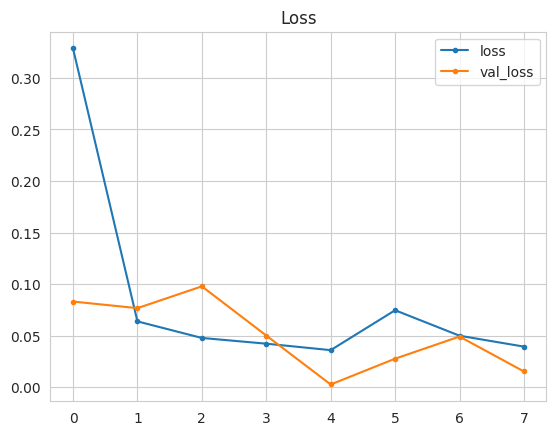

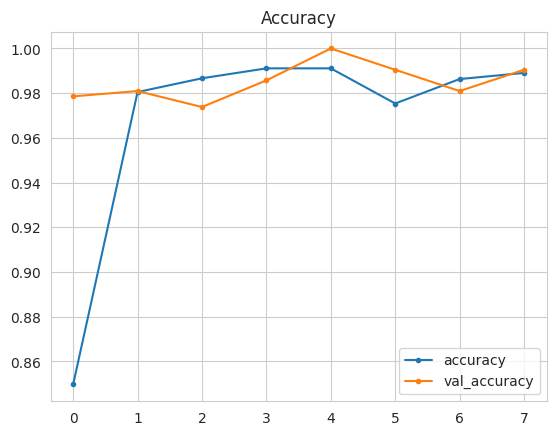

In [33]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Load saved model for evaluation

In [28]:
model = load_model('outputs/v1/powdery_mildew_detector_model.h5')

## Evaluate model on test set

In [35]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 14s 332ms/step - loss: 0.0025 - accuracy: 1.0000


## Save evaluation pickle

In [36]:
joblib.dump(value=evaluation, filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

## Load a random image as PIL

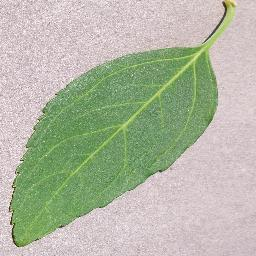

In [68]:
# Set the label to 0 to load a healthy image
# Set the label to 1 to load a powdery mildew image
label = labels[0]
# Set the pointer to select an image from the test set
# It must be a value between 0 and 421
pointer = 200

pil_image = image.load_img(
    test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
    target_size=images_shape, color_mode='rgb'
    )
pil_image

## Convert the image to array

In [56]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


## Predict whether a cherry leaf is healthy or contains powdery mildew

In [69]:
target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]  
print(pred_class)

healthy
